# Linear Regression Model of Housing Value

I want to relate housing prices to the natural amenities found in a given county. I will be using a dataset called the Natural Amenities Scale, which can be found [here](https://www.ers.usda.gov/data-products/natural-amenities-scale.aspx)

I will also be using a dataset of 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing natural amenity csv
nat = pd.read_csv('/Users/patricknorman/Documents/GitHub/metis-project-2/data/nat_amen_clean.csv')

In [3]:
# verifying sucessful import
nat.head()

,FIPS,COMBINED_COUNTY_INDEX,STATE,COUNTY,CENSUS_DIV,RUC,UIC,JAN_TEMP,JAN_SUN,JULY_TEMP,...,WATER,LN_WATER,JAN TEMP - Z,JAN SUN - Z,JUL TEMP - Z,JUL HUM - Z,TOPOG - Z,LN WATER AREA - Z,NAT_AMENITY,RANK
0,1001,1001,AL,AUTAUGA,6,2,2,47.4,130,81.0,...,1.40,4.944,1.20277,-0.64758,-0.13206,-0.68502,0.77701,0.26585,0.78,4
1,1003,1003,AL,BALDWIN,6,2,2,51.9,152,80.6,...,21.24,7.661,1.57504,0.01482,0.36308,-1.09576,-0.73966,1.70428,1.82,4
2,1005,1005,AL,BARBOUR,6,6,5,48.8,152,81.0,...,2.17,5.378,1.31859,0.01482,-0.01148,-0.89039,-0.73966,0.49570,0.19,4
3,1007,1007,AL,BIBB,6,6,6,44.8,130,80.8,...,0.50,3.916,0.98768,-0.64758,-0.30223,-0.68502,0.77701,-0.27812,-0.15,3
4,1009,1009,AL,BLOUNT,6,2,2,41.9,130,78.4,...,0.76,4.336,0.74778,-0.64758,0.09330,-0.68502,0.77701,-0.05592,0.23,4


In [4]:
#clarifying some column names
nat.rename(columns={'RUC':'RUC_93','UIC':'UIC_93'},inplace=True)

In [5]:
# examining shape
nat.shape

(3111, 22)

# Housing Data
I've found a good housing cost dataset for 2013 [here](https://data.census.gov/cedsci/table?q=home%20values%202013%20county&t=Housing&g=0100000US.050000&tid=ACSST1Y2013.S2506&hidePreview=true). I just have to import it and wrangle with the insane format.

Note: Don't be alarmed, this is just a list of 495 counties. It's supposedly a representative sample according to the Census...

In [6]:
# importing housing df
housing_raw = pd.read_csv('/Users/patricknorman/Documents/GitHub/metis-project-2/data/2013_housing.csv')
#housing_raw

In [7]:
# formatting housing df
housing = housing_raw.transpose()
housing.columns = housing.iloc[0]
housing.drop(labels=['Label'],inplace=True)
housing.reset_index(inplace=True)
housing.rename(columns={
    'index':'COUNTY',
    'Owner-occupied housing units with a mortgage':'N'},
               inplace=True)

housing.COUNTY = housing.COUNTY.replace({'!!Owner-occupied housing units with a mortgage!!':' ',
                                        'Estimate':'EST','Margin of Error':'MAR',
                                        'County,':'',
                                        ',':''}, regex=True,)

state_abb = {'Alabama':'AL','Alaska': 'AK','Arizona':'AZ','Arkansas':'AR',
             'California':'CA','Colorado':'CO','Conneticut':'CT','Delaware':'DE',
             'Florida':'FL','Georgia':'GA','Hawaii':'HI','Idaho':'ID','Illinois':'IL',
             'Indiana':'IN','Iowa':'IA','Kansas':'KS','Kentucky':'KY','Louisiana':'LA',
             'Maine':'ME','Maryland':'MD','Massachusetts':'MA','Michigan':'MI','Minnesota':'MN',
             'Mississippi':'MS','Missouri':'MO','Montana':'MT','Nebraska':'NE',
             'Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ','New Mexico':'NM',
             'New York':'NY','North Carolina':'NC','North Dakota':'ND','Ohio':'OH',
             'Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI',
             'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX',
             'Utah':'UT','Vermont':'VT','West Virginia':'WV','Virginia':'VA','Washington':'WA',
             'Wisconsin':'WI','Wyoming':'WY'}

housing.COUNTY = housing.COUNTY.replace(state_abb,regex=True)

In [8]:
# creating column for STATE
housing['STATE'] = housing.COUNTY.apply(lambda x: str(x)[-6:-3])

housing['STATE'] = housing['STATE'].str.upper()
#housing.head()

In [217]:
housing.columns

Index(['COUNTY', 'N', 'VALUE', 'Less than $50,000', '$50,000 to $99,999',
       '$100,000 to $149,999', '$150,000 to $199,999', '$200,000 to $299,999',
       '$300,000 to $499,999', '$500,000 or more', 'MEDIAN_VAL',
       'MORTGAGE STATUS',
       '    With either a second mortgage, or home equity loan, but not both',
       '        Second mortgage only', '        Home equity loan only',
       '    Both second mortgage and home equity loan',
       '    No second mortgage and no home equity loan',
       'HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS)',
       'Less than $10,000', '$10,000 to $24,999', '$25,000 to $34,999',
       '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999',
       '$100,000 to $149,999', '$150,000 or more',
       '    Median household income (dollars)',
       'RATIO OF VALUE TO HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
       'Less than 2.0', '2.0 to 2.9', '3.0 to 3.9', '4.0 or more',
       '    Not computed', '

In [9]:
# before I continue, let's get rid of some of the columns that i dont need
house = housing[['COUNTY','N','STATE','MEDIAN_VAL']] 
house.tail()

Label,COUNTY,N,STATE,MEDIAN_VAL
994,Rutherford NC EST,"8,552",NC,"115,200"
995,Rutherford NC MAR,"±1,169",NC,"±19,775"
996,Pasco FL EST,"72,592",FL,"143,600"
997,Pasco FL MAR,"±2,756",FL,"±7,379"
998,Jasper MO EST,"17,315",MO,"118,300"


In [10]:
house.shape

(999, 4)

In [11]:
# lets also strip whitespace from STATE for good measure
house['STATE'] = house['STATE'].apply(lambda x: str(x).strip())

<ipython-input-11-575fea2df78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['STATE'] = house['STATE'].apply(lambda x: str(x).strip())


In [12]:
# removing margins of error from house
house = house[~house.COUNTY.str.contains('MAR')]

# removing alaska and hawaii
house = house[~house.COUNTY.str.contains('AK')]
house = house[~house.COUNTY.str.contains('HI')]

house.head()

# removing state and est from COUNTY, uppercasing
house.COUNTY = house.COUNTY.apply(lambda x: str(x)[:-7].upper())

# stripping whitespace from COUNTY
house['COUNTY'] = house['COUNTY'].str.strip()

# Investigating Missing States

In [13]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

states = ["", "", "", "", "", "", "CT", "", "", "", 
          "", "", "", "", "", "", "", "", "", "", 
          "", "", "", "", "", "", "", "", "", "", 
          "", "", "", "", "", "", "", "", "", "", 
          "", "", "", "", "VT", "", "", "WV", "", ""]

In [14]:
# hmm, seem to be only 48 states made it into the df... is that accurate???
len(house['STATE'].unique())

46

In [15]:
# first let's identify which states aren't included.
house['STATE'].unique()

array(['AZ', 'CA', 'GA', 'IL', 'IN', 'KS', 'MD', 'MS', 'NH', 'NM', 'NY',
       'ND', 'RI', 'TX', 'VA', 'WA', 'CO', 'OH', 'MO', 'FL', 'IA', 'AL',
       'LA', 'WV', 'OR', 'MI', 'SC', 'TN', 'KY', 'UT', 'PA', 'MN', 'NC',
       'AR', 'MT', 'NJ', 'WY', 'MA', 'WI', 'OK', 'ID', 'NV', 'SD', 'NE',
       'DE', 'ME'], dtype=object)

we seem to be missing entries for CT, VT, and WV. Let's verify that these exist

there seems to be no entries for VT. What? Oh well. There are for WV and CT. Where did they go when we created STATE column?

# Updating RUCC
It's been difficult to find housing data for 1993, so I think I might just update the urban-rural continuum codes so that I can use housing prices that are more recent. I have 2013 codes [here](https://www.ers.usda.gov/data-products/rural-urban-continuum-codes.aspx)

In [17]:
# importing RUC_2013
ruc_13 = pd.read_csv('/Users/patricknorman/Documents/GitHub/metis-project-2/data/ruc_13/ruc_2013.csv')
ruc_13.head()

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,"54,571",2.0,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,"182,265",3.0,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,"27,457",6.0,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,"22,915",1.0,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,"57,322",1.0,Metro - Counties in metro areas of 1 million p...


In [18]:
nat.head()

,FIPS,COMBINED_COUNTY_INDEX,STATE,COUNTY,CENSUS_DIV,RUC_93,UIC_93,JAN_TEMP,JAN_SUN,JULY_TEMP,...,WATER,LN_WATER,JAN TEMP - Z,JAN SUN - Z,JUL TEMP - Z,JUL HUM - Z,TOPOG - Z,LN WATER AREA - Z,NAT_AMENITY,RANK
0,1001,1001,AL,AUTAUGA,6,2,2,47.4,130,81.0,...,1.40,4.944,1.20277,-0.64758,-0.13206,-0.68502,0.77701,0.26585,0.78,4
1,1003,1003,AL,BALDWIN,6,2,2,51.9,152,80.6,...,21.24,7.661,1.57504,0.01482,0.36308,-1.09576,-0.73966,1.70428,1.82,4
2,1005,1005,AL,BARBOUR,6,6,5,48.8,152,81.0,...,2.17,5.378,1.31859,0.01482,-0.01148,-0.89039,-0.73966,0.49570,0.19,4
3,1007,1007,AL,BIBB,6,6,6,44.8,130,80.8,...,0.50,3.916,0.98768,-0.64758,-0.30223,-0.68502,0.77701,-0.27812,-0.15,3
4,1009,1009,AL,BLOUNT,6,2,2,41.9,130,78.4,...,0.76,4.336,0.74778,-0.64758,0.09330,-0.68502,0.77701,-0.05592,0.23,4


In [19]:
# merging 2013 urban metric into nat
nat_13 = pd.merge(nat,ruc_13['RUCC_2013'],
                      left_on=nat['FIPS'],
                      right_on=ruc_13['FIPS'])

nat_13.drop('key_0',axis=1, inplace=True)
nat_13.drop('RUC_93',axis=1, inplace=True)
nat_13.drop('UIC_93',axis=1, inplace=True)

nat_13.head()

,FIPS,COMBINED_COUNTY_INDEX,STATE,COUNTY,CENSUS_DIV,JAN_TEMP,JAN_SUN,JULY_TEMP,HUMIDITY,TOPO,...,LN_WATER,JAN TEMP - Z,JAN SUN - Z,JUL TEMP - Z,JUL HUM - Z,TOPOG - Z,LN WATER AREA - Z,NAT_AMENITY,RANK,RUCC_2013
0,1001,1001,AL,AUTAUGA,6,47.4,130,81.0,66,14,...,4.944,1.20277,-0.64758,-0.13206,-0.68502,0.77701,0.26585,0.78,4,2.0
1,1003,1003,AL,BALDWIN,6,51.9,152,80.6,72,4,...,7.661,1.57504,0.01482,0.36308,-1.09576,-0.73966,1.70428,1.82,4,3.0
2,1005,1005,AL,BARBOUR,6,48.8,152,81.0,69,4,...,5.378,1.31859,0.01482,-0.01148,-0.89039,-0.73966,0.49570,0.19,4,6.0
3,1007,1007,AL,BIBB,6,44.8,130,80.8,66,14,...,3.916,0.98768,-0.64758,-0.30223,-0.68502,0.77701,-0.27812,-0.15,3,1.0
4,1009,1009,AL,BLOUNT,6,41.9,130,78.4,66,14,...,4.336,0.74778,-0.64758,0.09330,-0.68502,0.77701,-0.05592,0.23,4,1.0


# Combining House and Natural Amenity Data

In [20]:
# creating columns to merge on
house['MERGE'] = house['COUNTY'] + ' ' + house['STATE']

nat_13['MERGE'] = nat['COUNTY'] + ' ' + nat['STATE']

In [21]:
house.shape

(495, 5)

In [22]:
# now to merge the house and nat dfs

combo = pd.merge(nat_13,house['MEDIAN_VAL'],
                left_on=nat_13['MERGE'],
                right_on=house['MERGE'])

combo

,key_0,FIPS,COMBINED_COUNTY_INDEX,STATE,COUNTY,CENSUS_DIV,JAN_TEMP,JAN_SUN,JULY_TEMP,HUMIDITY,...,JAN SUN - Z,JUL TEMP - Z,JUL HUM - Z,TOPOG - Z,LN WATER AREA - Z,NAT_AMENITY,RANK,RUCC_2013,MERGE,MEDIAN_VAL
0,BALDWIN AL,1003,1003,AL,BALDWIN,6,51.9,152,80.6,72,...,0.01482,0.36308,-1.09576,-0.73966,1.70428,1.82,4,3.0,BALDWIN AL,"176,300"
1,ETOWAH AL,1055,1055,AL,ETOWAH,6,42.8,130,79.2,66,...,-0.64758,-0.04428,-0.68502,0.92868,0.58125,0.96,4,3.0,ETOWAH AL,"124,400"
2,HOUSTON AL,1069,1069,AL,HOUSTON,6,50.6,152,81.3,69,...,0.01482,0.06289,-0.89039,-0.73966,-0.70651,-0.79,3,3.0,HOUSTON AL,"131,800"
3,JEFFERSON AL,1073,1073,AL,JEFFERSON,6,44.2,130,79.9,66,...,-0.64758,-0.11192,-0.68502,0.92868,0.08485,0.51,4,1.0,JEFFERSON AL,"155,800"
4,LAUDERDALE AL,1077,1077,AL,LAUDERDALE,6,41.3,130,80.1,65,...,-0.64758,-0.41547,-0.61656,0.77701,1.10611,0.90,4,3.0,LAUDERDALE AL,"122,100"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,WALWORTH WI,55135,55135,WI,WAUPACA,3,16.2,137,71.0,59,...,-0.43682,-0.13055,-0.20582,-0.73966,0.41532,-2.48,2,6.0,WALWORTH WI,"191,900"
440,WAUKESHA WI,55141,55141,WI,WOOD,3,14.2,137,69.8,59,...,-0.43682,0.01984,-0.20582,-0.73966,0.46841,-2.44,2,4.0,WAUKESHA WI,"255,000"
441,WINNEBAGO WI,56005,56005,WY,CAMPBELL,8,21.7,158,70.7,37,...,0.19547,0.42383,1.30024,0.92868,-1.13236,0.79,4,5.0,WINNEBAGO WI,"139,800"
442,WOOD WI,56007,56007,WY,CARBON,8,21.7,190,66.0,32,...,1.15896,1.68757,1.64252,1.83868,0.00191,5.41,6,7.0,WOOD WI,"120,800"


In [23]:
# cleaning up combo df
combo.drop('key_0',axis=1,inplace=True)
combo.drop('COMBINED_COUNTY_INDEX',axis=1,inplace=True)
combo.drop('MERGE',axis=1,inplace=True)

In [24]:
combo[5:10]

,FIPS,STATE,COUNTY,CENSUS_DIV,JAN_TEMP,JAN_SUN,JULY_TEMP,HUMIDITY,TOPO,WATER,...,JAN TEMP - Z,JAN SUN - Z,JUL TEMP - Z,JUL HUM - Z,TOPOG - Z,LN WATER AREA - Z,NAT_AMENITY,RANK,RUCC_2013,MEDIAN_VAL
5,1083,AL,LIMESTONE,6,41.2,130,79.2,65,4,6.43,...,0.68987,-0.64758,-0.18209,-0.61656,-0.73966,1.07166,-0.42,3,2.0,"158,100"
6,1089,AL,MADISON,6,40.9,130,79.5,65,6,0.98,...,0.66505,-0.64758,-0.28860,-0.61656,-0.43633,0.07356,-1.25,3,2.0,"163,900"
7,1095,AL,MARSHALL,6,40.9,130,77.6,66,6,9.00,...,0.66505,-0.64758,0.22228,-0.68502,-0.43633,1.24995,0.37,4,4.0,"130,500"
8,1097,AL,MOBILE,6,51.2,152,81.6,72,4,24.98,...,1.51713,0.01482,0.03390,-1.09576,-0.73966,1.79023,1.52,4,2.0,"131,600"
9,1117,AL,SHELBY,6,45.0,130,79.3,66,15,1.81,...,1.00423,-0.64758,0.11832,-0.68502,0.92868,0.40169,1.12,4,1.0,"199,100"


# Scraping Population Density
I had an idea on how to incorporate scraped data. Maybe I could scrape population density per county off of Wikipedia.

In [25]:
# importing tools
from bs4 import BeautifulSoup
import requests
import time
import re
from IPython.display import clear_output

In [26]:
# I need to locate the target tag in one county, then apply it generally

name = 'YUMA'
state = 'AZ'
yuma_url = 'https://en.wikipedia.org/wiki/Yuma,_Arizona'

req = requests.get(yuma_url)
soup = BeautifulSoup(req.text)

bowl = soup.find_all(class_='mergedrow')
#bowl_df = pd.DataFrame(bowl)

#target = bowl_df[0][10]

#result = np.zeros((0,3))
#new_row = [name,state,target]

#np.vstack((result,new_row))

#print(result)
headers = soup.find_all('th', scope='row')

In [27]:
bucket = []

for header in headers:
    if 'Density' in header.text:
        bucket.append(header.find_next().text)
        
bucket

['814.70/sq\xa0mi (31.80/km2)']

In [28]:
def countyScrape(tuplist):
    '''
    returns the population density of a county based on wikipedia page
    
    tuplist: list of tuples in form ('County','State')
    
    returns a list of densities, along with a print statement going over
    the number of errors, and the number of entries that seem to be related
    to population density. 
    '''
    densities = []
    wins = 0
    failures = 0
    
    for i in range(len(tuplist)):
        name = tuplist[i][0]
        state = tuplist[i][1]

        url = f'https://en.wikipedia.org/wiki/{name}_County,_{state}'
        print('scraping', url)
        response = requests.get(url)
        if int(response.status_code) == 404:
            return 'error at index', i
        
        print('status code: ',response.status_code, 'for', name)

        soup = BeautifulSoup(response.text)
        
        bowl = soup.find_all('th',scope='row')
        #print('bowl created')
        
        for header in bowl:
            if 'Density' in header.text:
                densities.append(header.find_next().text)
        
        print('pulling', densities[-1])
        print('\n\n')
        
        if i % 5 == 0:
            clear_output()
            
    return densities

In [29]:
def stateConvert(state_abb):
    converter = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona",
                 "AR":"Arkansas","CA":"California","CO":"Colorado",
                 "CT":"Connecticut","DE":"Delaware","FL":"Florida",
                 "GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois",
                 "IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky",
                 "LA":"Louisiana","ME":"Maine","MD":"Maryland",
                 "MA":"Massachusetts","MI":"Michigan","MN":"Minnesota",
                 "MS":"Mississippi","MO":"Missouri","MT":"Montana",
                 "NE":"Nebraska","NV":"Nevada","NH":"New Hampshire",
                 "NJ":"New Jersey","NM":"New Mexico","NY":"New York",
                 "NC":"North Carolina","ND":"North Dakota","OH":"Ohio",
                 "OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania",
                 "RI":"Rhode Island","SC":"South Carolina",
                 "SD":"South Dakota","TN":"Tennessee","TX":"Texas",
                 "UT":"Utah","VT":"Vermont","VA":"Virginia",
                 "WA":"Washington","WV":"West Virginia","WI":"Wisconsin",
                 "WY":"Wyoming"}
    
    return converter[state_abb]

In [30]:
# creating lists from combo df
county_list = list(combo['COUNTY'])
state_list = list(combo['STATE'])

# formatting county_list
for i in range(len(county_list)):
    county_list[i] = county_list[i].title()
    
for i in range(len(state_list)):
    state_list[i] = stateConvert(state_list[i])
    
# zipping lists together
locator = list(zip(county_list,state_list))

# turning list of tuples into array for vectorization / making life easier
loc_arr = np.array(locator)

In [31]:
loc_arr[74] = ['Chattahoochee','Georgia']

In [32]:
loc_arr[74]

array(['Chattahoochee', 'Georgia'], dtype='<U14')

In [33]:
# fixing misspellings, other errors
loc_arr[74] = ('Chattahoochee','Georgia')
loc_arr[319] = ('McKean', 'Pennsylvania')
loc_arr[377] = ('McCulloch', 'Texas')
loc_arr[409] = ('Bedford', 'Virginia')
loc_arr[427] = ['McDowell','West_Virginia']

In [34]:
loc_arr = np.core.defchararray.replace(loc_arr, ' ', '_')

In [35]:
len(loc_arr)

444

In [36]:
# scraping pop density, compiling it in a list of str
densities = countyScrape(loc_arr)

scraping https://en.wikipedia.org/wiki/Campbell_County,_Wyoming
status code:  200 for Campbell
pulling 9.6/sq mi (3.7/km2)



scraping https://en.wikipedia.org/wiki/Carbon_County,_Wyoming
status code:  200 for Carbon
pulling 2.0/sq mi (0.77/km2)



scraping https://en.wikipedia.org/wiki/Park_County,_Wyoming
status code:  200 for Park
pulling 4.0/sq mi (1.6/km2)





In [97]:
# converting list to df, adding it to the combo df for FINAL (!) df for 
# analysis!!!

density_df = pd.DataFrame(densities, columns= ['DENSITY'])

df = pd.concat([combo,density_df],axis=1)

    # removing gunk fron density column
df['DENSITY'] = df['DENSITY'].apply(lambda x: x[:x.index('/')])

    # stripping commas
df['DENSITY'] = df['DENSITY'].apply(lambda x: x.replace(',',''))

    # making densities numeric
df['DENSITY'] = df['DENSITY'].apply(lambda x: float(x))


In [98]:
df.head()

,FIPS,STATE,COUNTY,CENSUS_DIV,JAN_TEMP,JAN_SUN,JULY_TEMP,HUMIDITY,TOPO,WATER,...,JAN SUN - Z,JUL TEMP - Z,JUL HUM - Z,TOPOG - Z,LN WATER AREA - Z,NAT_AMENITY,RANK,RUCC_2013,MEDIAN_VAL,DENSITY
0,1003,AL,BALDWIN,6,51.9,152,80.6,72,4,21.24,...,0.01482,0.36308,-1.09576,-0.73966,1.70428,1.82,4,3.0,"176,300",137.0
1,1055,AL,ETOWAH,6,42.8,130,79.2,66,15,2.55,...,-0.64758,-0.04428,-0.68502,0.92868,0.58125,0.96,4,3.0,"124,400",190.0
2,1069,AL,HOUSTON,6,50.6,152,81.3,69,4,0.22,...,0.01482,0.06289,-0.89039,-0.73966,-0.70651,-0.79,3,3.0,"131,800",170.0
3,1073,AL,JEFFERSON,6,44.2,130,79.9,66,15,1.00,...,-0.64758,-0.11192,-0.68502,0.92868,0.08485,0.51,4,1.0,"155,800",590.0
4,1077,AL,LAUDERDALE,6,41.3,130,80.1,65,14,6.86,...,-0.64758,-0.41547,-0.61656,0.77701,1.10611,0.90,4,3.0,"122,100",130.0


In [99]:
# Oh, I almost forgot to make sure the MEDIAN VAL column is numerical, lol. 
df['MEDIAN_VAL'] = df['MEDIAN_VAL'].apply(lambda x: float(x.replace(',','')))
type(df['MEDIAN_VAL'][0])

numpy.float64

# Linear Regression
Finally I have all the data I need to perform a liner regression. 

0. Data Preparation for Regression
1. EDA
2. Test-Validate Split
3. Train candidate models
    1. Ridge w various alphas
    2. LASSO w various alphas
4. Validate candidates, choose final model and alpha parameter
5. Train-Test Split using final model

## Data Preparation for Regression
I need to make sure that all my features are numerical, or at least ordinal. All are numerical except FIPS, CENSUS_DIV, TOPO, and RUCC_2013. Out of those, all are ordinal categories except CENSUS_DIV. 
I need to create dummy variables for the categorical feature, CENSUS_DIV. They're integers, but I still need to bust them into their own columns. I'm not sure how to approach this exact situation, so I'm actually going to make them string categories, and then use the process that I'm more familiar with for dealing with categories like that. 

In [100]:
df['CENSUS_DIV'].value_counts()

5    110
3     70
2     58
7     51
9     42
6     37
4     33
8     28
1     15
Name: CENSUS_DIV, dtype: int64

In [101]:
# converting CENSUS_DIV to str, adding 'region' preceding value
df['CENSUS_DIV'] = df['CENSUS_DIV'].apply(lambda x: 'region '+str(x))

In [102]:
cat_x = df.loc[:, ['CENSUS_DIV']]
cat_y = df['MEDIAN_VAL']
cat_x

,CENSUS_DIV
0,region 6
1,region 6
2,region 6
3,region 6
4,region 6
...,...
439,region 3
440,region 3
441,region 8
442,region 8


The dataset is divided into 9 census regions that are encapsulated in CENSUS_DIV. So I should be able to create 8 new features to encapsulate this. 

In [103]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(cat_x)

OneHotEncoder(drop='first', sparse=False)

In [104]:
# transforming ohe_x, putting cat feature into a df
ohe_x = ohe.transform(cat_x)
columns = ohe.get_feature_names(['CENSUS_DIV'])
ohe_x_df = pd.DataFrame(ohe_x, columns=columns, index=cat_x.index)
# ohe_x_df

In [105]:
# recombining the categorical and numeric variables
df = pd.concat([df, ohe_x_df],axis=1)
df

,FIPS,STATE,COUNTY,CENSUS_DIV,JAN_TEMP,JAN_SUN,JULY_TEMP,HUMIDITY,TOPO,WATER,...,MEDIAN_VAL,DENSITY,CENSUS_DIV_region 2,CENSUS_DIV_region 3,CENSUS_DIV_region 4,CENSUS_DIV_region 5,CENSUS_DIV_region 6,CENSUS_DIV_region 7,CENSUS_DIV_region 8,CENSUS_DIV_region 9
0,1003,AL,BALDWIN,region 6,51.9,152,80.6,72,4,21.24,...,176300.0,137.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1055,AL,ETOWAH,region 6,42.8,130,79.2,66,15,2.55,...,124400.0,190.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1069,AL,HOUSTON,region 6,50.6,152,81.3,69,4,0.22,...,131800.0,170.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1073,AL,JEFFERSON,region 6,44.2,130,79.9,66,15,1.00,...,155800.0,590.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1077,AL,LAUDERDALE,region 6,41.3,130,80.1,65,14,6.86,...,122100.0,130.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,55135,WI,WAUPACA,region 3,16.2,137,71.0,59,4,1.86,...,191900.0,69.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
440,55141,WI,WOOD,region 3,14.2,137,69.8,59,4,2.06,...,255000.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
441,56005,WY,CAMPBELL,region 8,21.7,158,70.7,37,15,0.10,...,139800.0,9.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
442,56007,WY,CARBON,region 8,21.7,190,66.0,32,21,0.85,...,120800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [130]:
num_df = df[df.columns[4:]]
num_df

,JAN_TEMP,JAN_SUN,JULY_TEMP,HUMIDITY,TOPO,WATER,LN_WATER,JAN TEMP - Z,JAN SUN - Z,JUL TEMP - Z,...,MEDIAN_VAL,DENSITY,CENSUS_DIV_region 2,CENSUS_DIV_region 3,CENSUS_DIV_region 4,CENSUS_DIV_region 5,CENSUS_DIV_region 6,CENSUS_DIV_region 7,CENSUS_DIV_region 8,CENSUS_DIV_region 9
0,51.9,152,80.6,72,4,21.24,7.661,1.57504,0.01482,0.36308,...,176300.0,137.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,42.8,130,79.2,66,15,2.55,5.540,0.82223,-0.64758,-0.04428,...,124400.0,190.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50.6,152,81.3,69,4,0.22,3.107,1.46749,0.01482,0.06289,...,131800.0,170.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,44.2,130,79.9,66,15,1.00,4.602,0.93805,-0.64758,-0.11192,...,155800.0,590.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41.3,130,80.1,65,14,6.86,6.531,0.69815,-0.64758,-0.41547,...,122100.0,130.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,16.2,137,71.0,59,4,1.86,5.226,-1.37827,-0.43682,-0.13055,...,191900.0,69.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
440,14.2,137,69.8,59,4,2.06,5.326,-1.54372,-0.43682,0.01984,...,255000.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
441,21.7,158,70.7,37,15,0.10,2.302,-0.92328,0.19547,0.42383,...,139800.0,9.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
442,21.7,190,66.0,32,21,0.85,4.445,-0.92328,1.15896,1.68757,...,120800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Exploratory Data Analysis

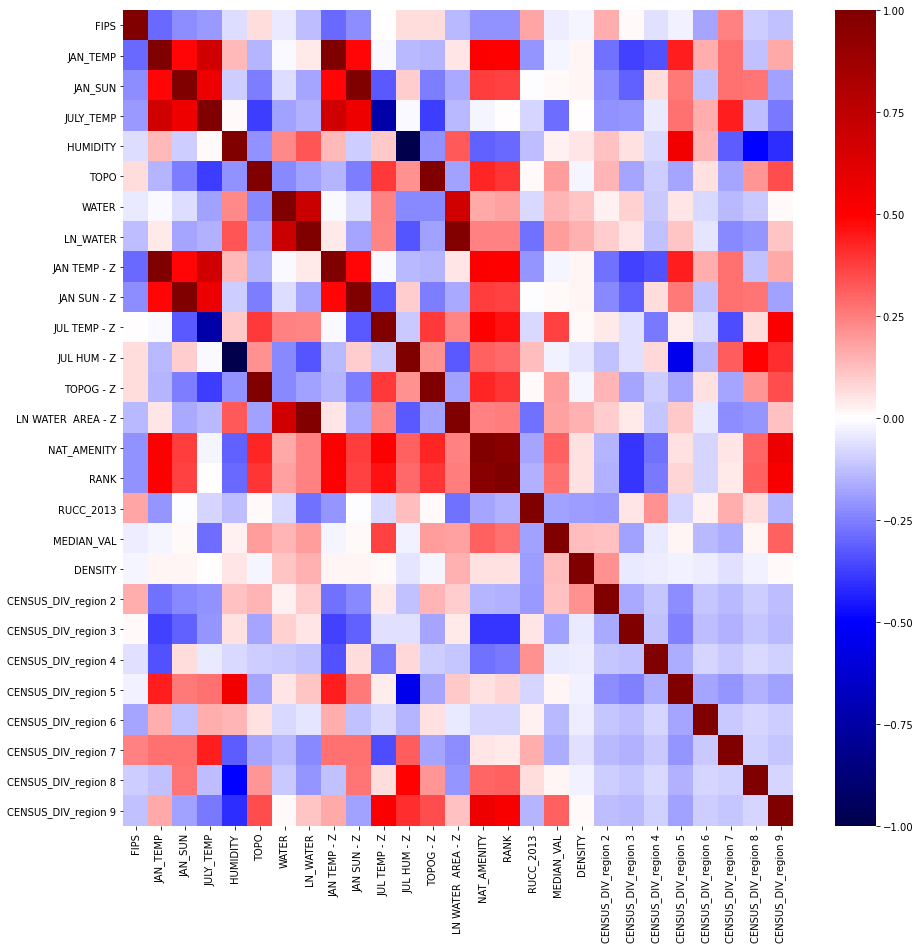

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

From a first glance, it seems that the things that correlate the most strongly with MEDIAN_VAL are being in census region 9, the z-score for July temperature, and the natural amenity score, which is interesting... I expected the RUCC_2013 scores to be more correlated, but the relationship isn't that strong.

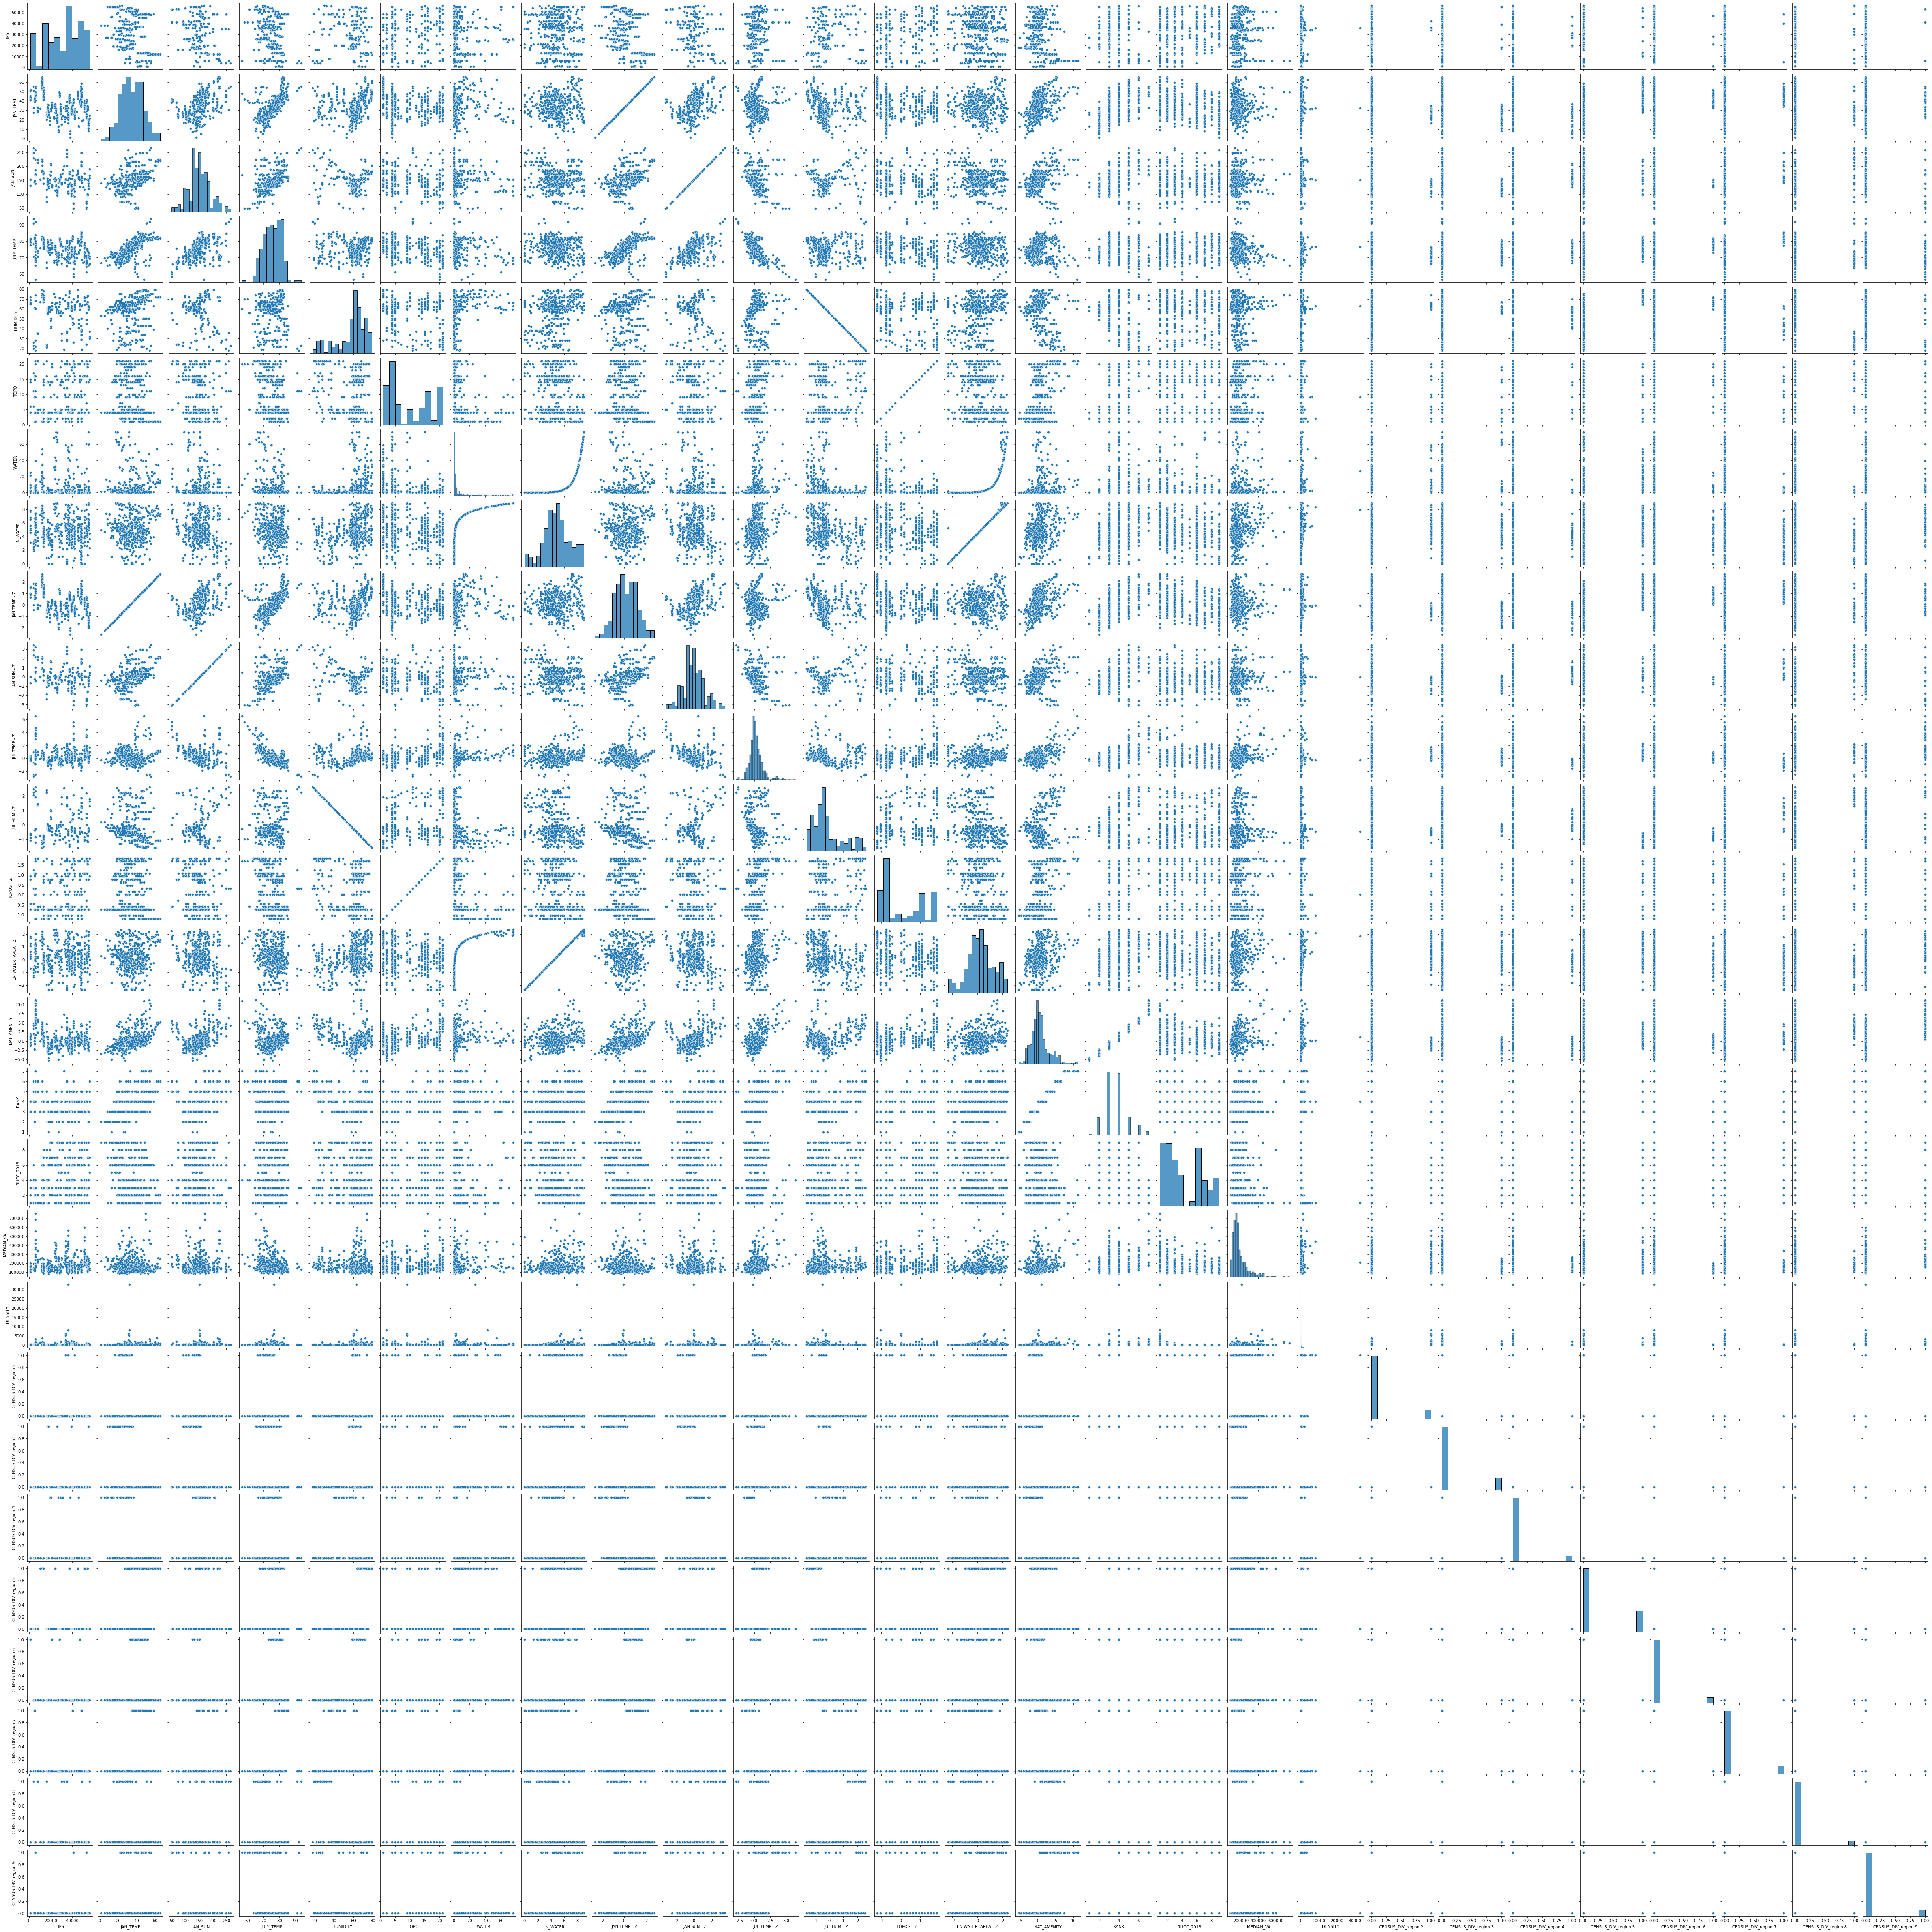

In [218]:
sns.pairplot(df)

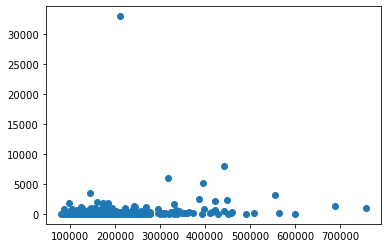

In [232]:
plt.scatter(df['MEDIAN_VAL'], df['DENSITY'])

## Test-validate-train split

In [185]:
# importing tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# separating target (y) from features (x)
x, y = num_df.drop('MEDIAN_VAL',axis=1), df['MEDIAN_VAL']

x, x_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = .25, random_state = 6)

#this helps with the way kf will generate indices below
x, y = np.array(x), np.array(y)

## Standard-Scaling my Variables

In [197]:
# importing tools
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

## Simple validation using arbitrary alpha
This is a bad way to do this, but I just want to make sure that my procedure is working before I add complexity to it.

In [187]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [192]:
# creating arbitrary regularization strength
a = 1000

# creating LASSO and Ridge objects
lasso = Lasso(alpha = a)
ridge = Ridge(alpha = a)

In [193]:
# fitting models to training data
lasso.fit(x_scaled,y)
ridge.fit(x_scaled,y)

Ridge(alpha=1000)

In [194]:
# creating predicted values for testing
lasso_predictions = lasso.predict(x_test_scaled)
ridge_predictions = ridge.predict(x_test_scaled)

In [196]:
# scoring models
from sklearn.metrics import r2_score

def mae(y_true, y_predicted):
    return np.mean(np.abs(y_predicted - y_true))

print('The Ridge regression had an r2 of', round(r2_score(y_val, ridge_predictions),2))
print('The LASSO regression had an r2 of', round(r2_score(y_val, lasso_predictions),2))

print('\nThe Ridge regression was off by $',round(mae(y_val,ridge_predictions)))
print('The LASSO regression was off by $',round(mae(y_val,lasso_predictions)))

The Ridge regression had an r2 of -0.1
The LASSO regression had an r2 of -0.25

The Ridge regression was off by $ 69587
The LASSO regression was off by $ 78400


So, just choosing an arbitrary number for our $\lambda$, both regressions did *really badly*. They were both worse than just guessing. 

## Simple validation of candidates using a range of alphas

In [214]:
alphalist = 10**(np.linspace(1,5,100))
ridge_mae = np.zeros(len(alphalist))
ridge_r2 = np.zeros(len(alphalist))

lasso_mae = np.zeros(len(alphalist))
lasso_r2 = np.zeros(len(alphalist))

In [215]:
# looping through all alpha values, collecting model errors
from sklearn.pipeline import Pipeline

for i, a in enumerate(alphalist):
    
    # creating pipelines, fitting regressions based on alphas
    ridge_steps = [('standardize', StandardScaler()),
                  ('lasso', Lasso(alpha = a))]
    
    ridge_pipe = Pipeline(ridge_steps)
    ridge_pipe.fit(x_train, y_train)
    
    lasso_steps = [('standardize',StandardScaler()),
                  ('ridge',Ridge(alpha = a))]
    
    lasso_pipe = Pipeline(lasso_steps)
    lasso_pipe.fit(x_train, y_train)
    
    # making predictions
    ridge_pred = ridge_pipe.predict(x_val.values)
    lasso_pred = lasso_pipe.predict(x_val.values)
    
    # finding error based on alpha
    ridge_mae[i] = mae(y_val,ridge_pred)
    ridge_r2[i] = r2_score(y_val, ridge_pred)
    
    lasso_mae[i] = mae(y_val,lasso_pred)
    lasso_r2[i] = r2_score(y_val, lasso_pred)
    
print('Ridge regression lowest MAE: $', np.min(ridge_mae))
print('Ridge regression highest r2:', np.max(ridge_r2))
print('')
print('Lasso regression lowest MAE: $', np.min(lasso_mae))
print('Lasso regression highest r2:', np.max(lasso_r2))

/Users/patricknorman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234387166779.7508, tolerance: 189937451.83458647
  model = cd_fast.enet_coordinate_descent(
/Users/patricknorman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205308221768.32507, tolerance: 189937451.83458647
  model = cd_fast.enet_coordinate_descent(
/Users/patricknorman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175592179745.29285, tolerance: 189937451.83458647
  model = cd_fast.enet_coordinate_descent(
/Users/patricknorman/anaconda3/lib/python3.8/site-packag

Ridge regression lowest MAE: $ 63793.26617711529
Ridge regression highest r2: 0.1894961550835017

Lasso regression lowest MAE: $ 64338.99811943272
Lasso regression highest r2: 0.18163068643960867


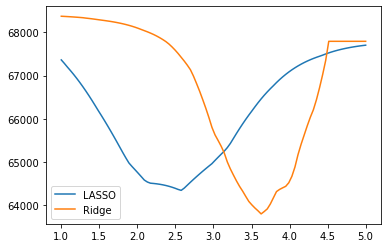

In [216]:
# plotting LASSO validation error against alpha

plt.plot(np.log10(alphalist),lasso_mae, label='LASSO')
plt.plot(np.log10(alphalist),ridge_mae, label='Ridge')

plt.legend()

## Using Cross-Validation to determine alpha and model type

In [236]:
from sklearn.model_selection import KFold

x, y = num_df.drop('MEDIAN_VAL',axis=1), df['MEDIAN_VAL']
x, x_test, y, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

x,y = np.array(x), np.array(y)

In [ ]:
kf = Kfold(n_splits = 5, shuffle = True, random_state = 51)

alphalist = np.linspace(2,4,100)

ridge_val_err = np.zeros(len(alphalist))
lasso_val_err = np.zeros(len(alphalist))


for i,a in enumerate(alphalist):
    
    ridge = Ridge(alpha=a)
    lasso = Lasso(alpha=a)
    
    for train_index, val_index in kf.split(x,y):

        # creating train / validation split
        x_train, y_train = x[train_index], y[train_index]
        x_val, y_val = x[val_index], y[val_index]  
        
        # training models
        ridge.fit(x_train,y_train)
        lasso.fit(x_train, y_train)

## Train-Test split using final model